In [36]:
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")
print("shape of dataset: ",df.shape)
df.head()

shape of dataset:  (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()
print("\n Missing Values: \n", df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

 Missing Values: 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Ol

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette = "pastel")

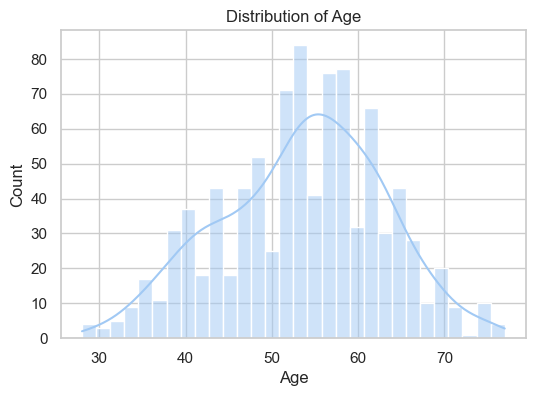

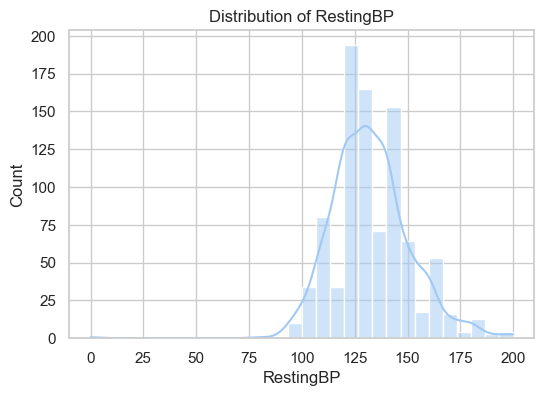

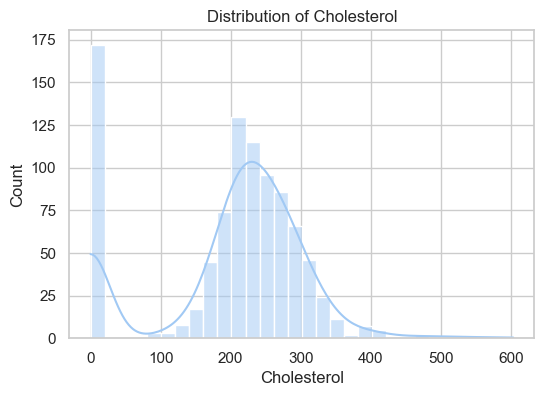

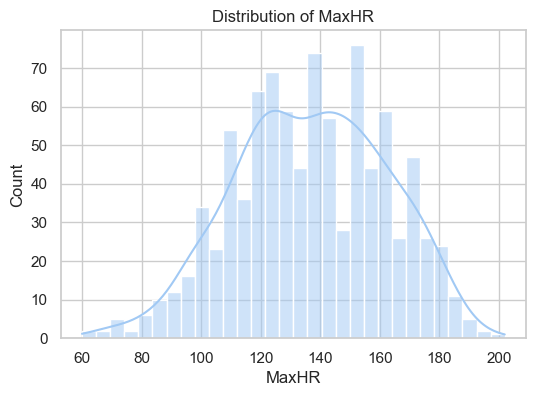

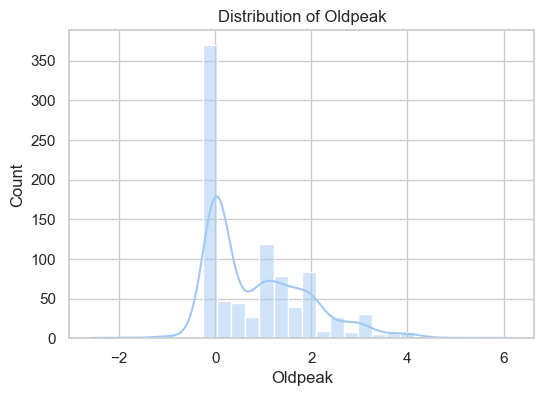

In [5]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show

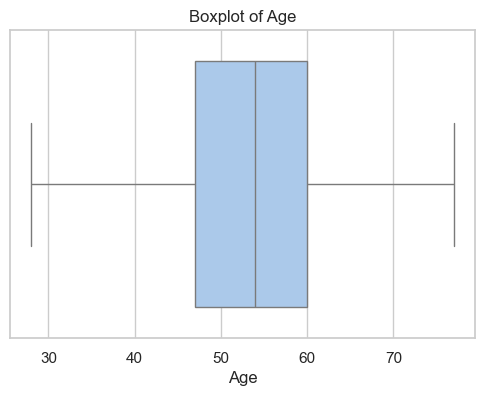

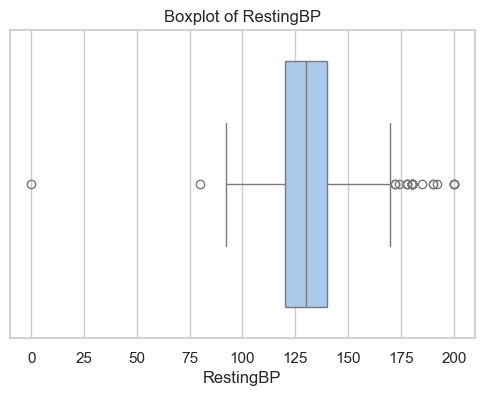

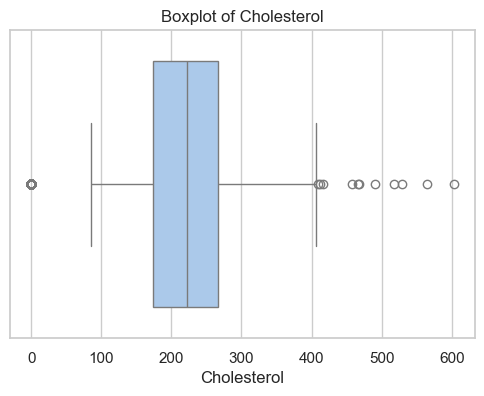

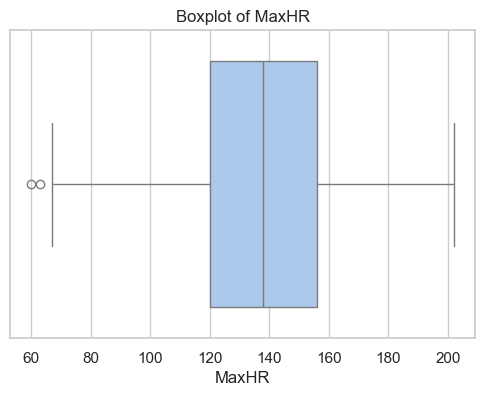

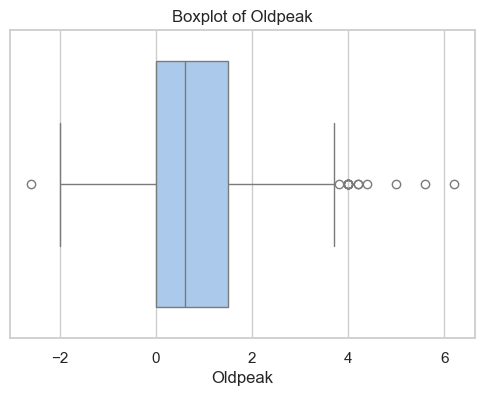

In [6]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

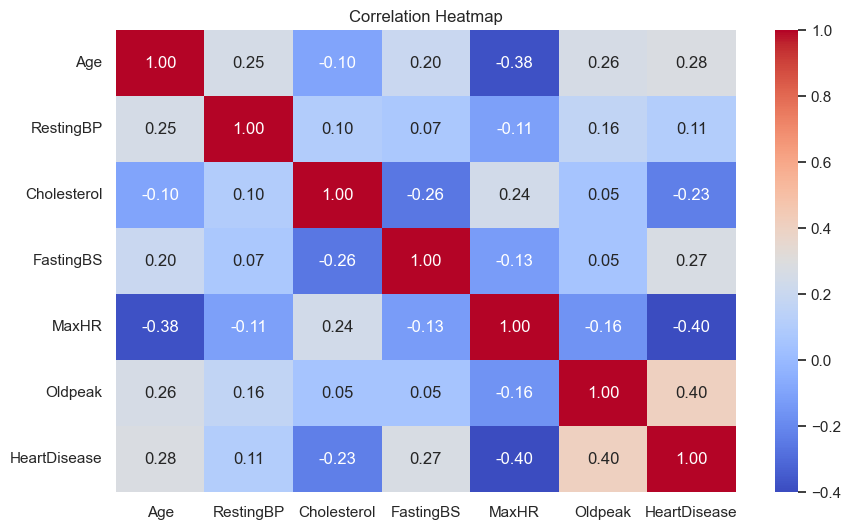

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.select_dtypes(include='object').nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
print("Zero Cholesterol values:", df[df['Cholesterol'] == 0].shape[0])

Zero Cholesterol values: 172


In [11]:
# Calculate median of non-zero cholesterol values
median_chol = df[df['Cholesterol'] != 0]['Cholesterol'].median()

# Replace 0s with median
df['Cholesterol'] = df['Cholesterol'].replace(0, median_chol)

# Confirm replacement
print("Zero Cholesterol values after replacement:", (df['Cholesterol'] == 0).sum())


Zero Cholesterol values after replacement: 0


In [12]:
print("Zero RestingBP values:", df[df['RestingBP'] == 0].shape[0])

Zero RestingBP values: 1


In [13]:
median_bp = df[df['RestingBP'] != 0]['RestingBP'].median()
df['RestingBP'] = df['RestingBP'].replace(0, median_bp)
print("Zero RestingBP values after replacement:", (df['RestingBP'] == 0).sum())

Zero RestingBP values after replacement: 0


# Logistic regression

In [14]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [15]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8858695652173914
Precision: 0.8715596330275229
Recall: 0.9313725490196079
F1 Score: 0.9004739336492891


In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

In [21]:
dt = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

In [22]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8419532196440219


In [23]:
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

Accuracy: 0.8260869565217391
Precision: 0.8301886792452831
Recall: 0.8627450980392157
F1 Score: 0.8461538461538461


# Neural Network

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(50, ), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [27]:
y_pred_mlp = mlp.predict(X_test)

print("Neural Network Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp))

Neural Network Results:
Accuracy: 0.875
Precision: 0.883495145631068
Recall: 0.8921568627450981
F1 Score: 0.8878048780487805


In [32]:
y_true = y_test

# Predictions from each model
y_pred_logreg = log_reg.predict(X_test)
y_pred_dt = best_dt.predict(X_test)
y_pred_nn = mlp.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

metrics_logreg = get_metrics(y_true, y_pred_logreg)
metrics_dt = get_metrics(y_true, y_pred_dt)
metrics_nn = get_metrics(y_true, y_pred_nn)

comparison_df = pd.DataFrame({
    'Logistic Regression': metrics_logreg,
    'Decision Tree': metrics_dt,
    'Neural Network': metrics_nn
})

print(comparison_df)


           Logistic Regression  Decision Tree  Neural Network
Accuracy              0.885870       0.826087        0.875000
Precision             0.871560       0.830189        0.883495
Recall                0.931373       0.862745        0.892157
F1 Score              0.900474       0.846154        0.887805


# Confusion Matrix

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

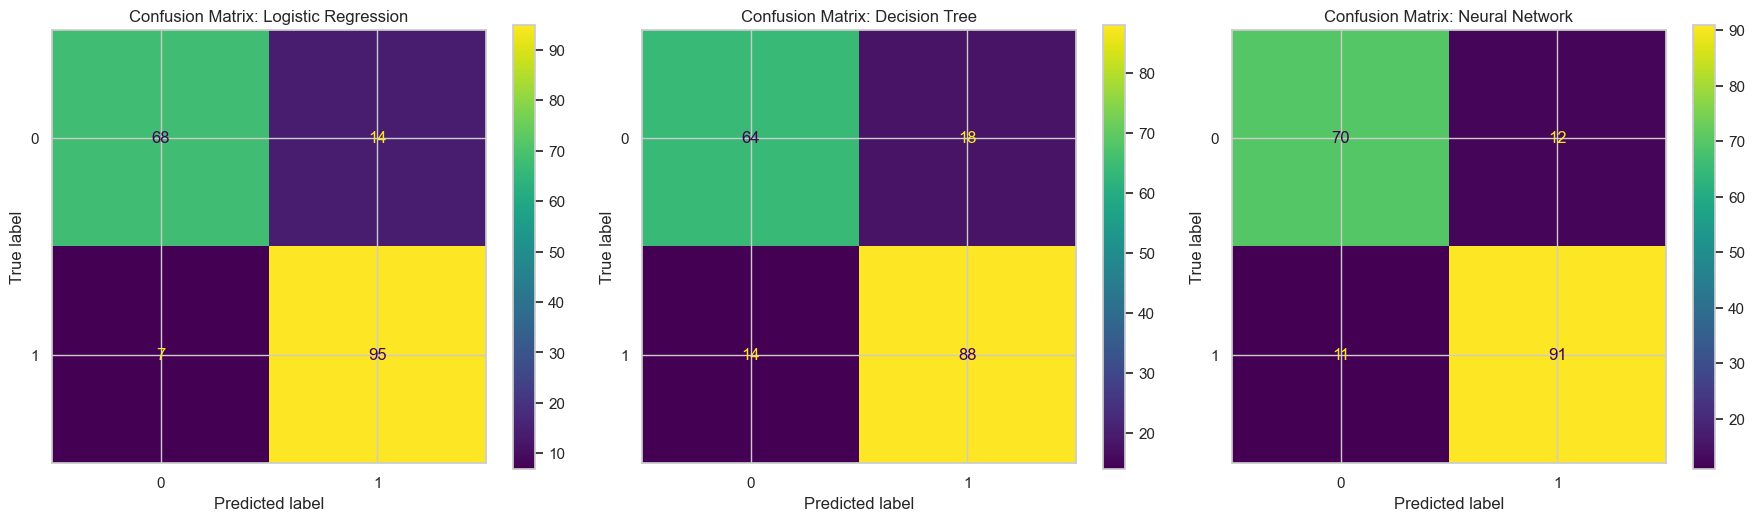

In [35]:
models = {
    'Logistic Regression': y_pred_logreg,
    'Decision Tree': y_pred_dt,
    'Neural Network': y_pred_nn
}
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, models.items()):
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax)
    ax.set_title(f'Confusion Matrix: {name}')
plt.tight_layout()
plt.show()

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [42]:
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.875
Precision: 0.883495145631068
Recall: 0.8921568627450981
F1 Score: 0.8878048780487805


# XG Boost

In [43]:
import xgboost as xgb

In [44]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:57:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [45]:
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost Results:
Accuracy: 0.8586956521739131
Precision: 0.8725490196078431
Recall: 0.8725490196078431
F1 Score: 0.8725490196078431


# Comparing Different Models

     Model  Accuracy  Precision  Recall  F1 Score
0       LR    0.8859     0.8716  0.9314    0.9005
1       DT    0.8261     0.8302  0.8627    0.8462
2       RF    0.8750     0.8835  0.8921    0.8878
3  XGBoost    0.8587     0.8725  0.8725    0.8725
4       NN    0.8750     0.8835  0.8921    0.8878


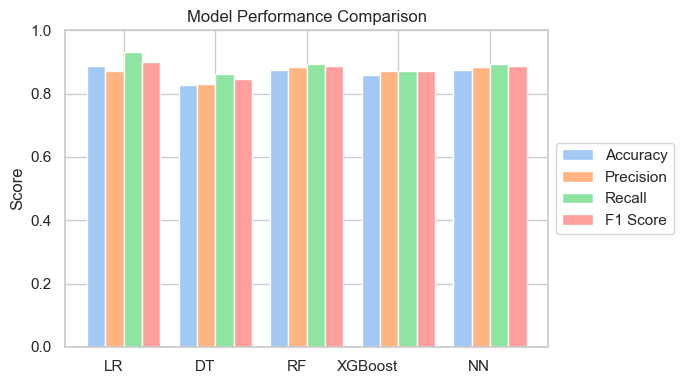

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


results = {
    'Model': [
        'LR',
        'DT',
        'RF',
        'XGBoost',
        'NN'
    ],
    'Accuracy': [
        0.8859,  # Logistic Regression
        0.8261,  # Decision Tree
        0.8750,  # Random Forest
        0.8587,  # XGBoost
        0.8750   # Neural Network
    ],
    'Precision': [
        0.8716,
        0.8302,
        0.8835,
        0.8725,
        0.8835
    ],
    'Recall': [
        0.9314,
        0.8627,
        0.8921,
        0.8725,
        0.8921
    ],
    'F1 Score': [
        0.9005,
        0.8462,
        0.8878,
        0.8725,
        0.8878
    ]
}

df_results = pd.DataFrame(results)

# comparison table
print(df_results)

# grouped bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(df_results['Model']))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(7, 4))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, df_results[metric], width, label=metric)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width * (len(metrics)-1) / 2)
ax.set_xticklabels(df_results['Model'], ha='right')
ax.set_ylim(0, 1)
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()


# ROC Curve

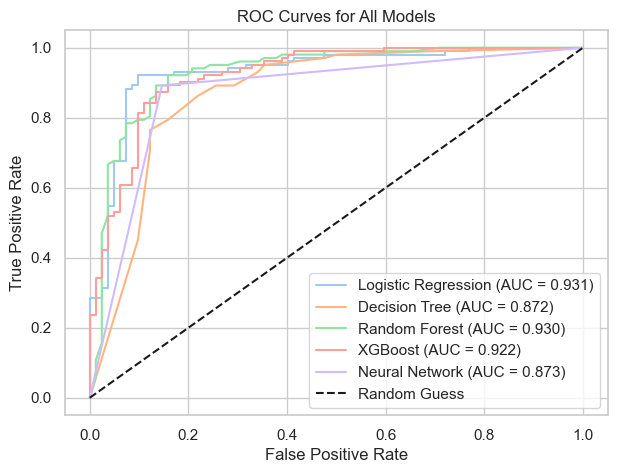

In [48]:
from sklearn.metrics import roc_curve, auc

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": best_dt,
    "Random Forest": rf,
    "XGBoost": xgb_model,
    "Neural Network": mlp
}

plt.figure(figsize=(7, 5))

for name, model in models.items():
    
    if name == "Neural Network":
        y_pred_proba = model.predict(X_test).ravel()  # NN outputs probabilities 
    else:
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Take column for positive class

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
